In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
with open("result.txt") as f:
    lines = f.readlines()
    df = []
    for line in lines:
        print(line)
        # convert line to dict
        line = line.replace(" ", "")
        line = line.replace("{", "")
        line = line.replace("}", "")
        line = line.replace("'", "")
        line = line.split(",")
        line = [i.split(":") for i in line]
        line = {i[0]:i[1] for i in line}
        df.append(line)

df = pd.DataFrame(df)

{'test_size': 0.5, 'outlier_ratio': None, 'random_outlier': False, 'metric': 'euclidean', 'm': None, 'reg': 0.1, 'without_outlier': True, 'algo': 'parial-order-gromov', 'accuracy_1': 0.5, 'f1_macro_1': 0.48100127266947873, 'f1_micro_1': 0.5, 'accuracy_3': 0.38333333333333336, 'f1_macro_3': 0.340735584528688, 'f1_micro_3': 0.38333333333333336, 'accuracy_5': 0.35, 'f1_macro_5': 0.33597366643018817, 'f1_micro_5': 0.35}

{'test_size': 0.5, 'outlier_ratio': None, 'random_outlier': False, 'metric': 'euclidean', 'm': None, 'reg': 0.1, 'without_outlier': True, 'algo': 'parial-order-gromov', 'accuracy_1': 0.6333333333333333, 'f1_macro_1': 0.6341793372319688, 'f1_micro_1': 0.6333333333333333, 'accuracy_3': 0.5166666666666667, 'f1_macro_3': 0.504165605195017, 'f1_micro_3': 0.5166666666666667, 'accuracy_5': 0.5333333333333333, 'f1_macro_5': 0.5196880604775342, 'f1_micro_5': 0.5333333333333333}

{'test_size': 0.5, 'outlier_ratio': None, 'random_outlier': False, 'metric': 'euclidean', 'm': None, 're

In [3]:
df.accuracy_1 = df.accuracy_1.astype(float)
df.accuracy_3 = df.accuracy_3.astype(float)
df.accuracy_5 = df.accuracy_5.astype(float)

In [4]:
# group by reg column and calculate mean and std of accuracy 
k_1_acc = df.groupby('reg').agg({'accuracy_1': ['mean', 'std']})

In [5]:
# group by reg column and calculate mean and std of accuracy 
k_3_acc = df.groupby('reg').agg({'accuracy_3': ['mean', 'std']})

In [6]:
# group by reg column and calculate mean and std of accuracy 
k_5_acc = df.groupby('reg').agg({'accuracy_5': ['mean', 'std']})

In [7]:
k_1_acc, k_3_acc, k_5_acc

(      accuracy_1          
             mean       std
 reg                       
 0.1     0.630833  0.054013
 1.0     0.774306  0.029185
 10.0    0.847917  0.039588
 100.0   0.864583  0.055405
 200.0   0.839394  0.057746
 500.0   0.811458  0.030517,
       accuracy_3          
             mean       std
 reg                       
 0.1     0.504167  0.047181
 1.0     0.641667  0.059987
 10.0    0.636111  0.032824
 100.0   0.654861  0.047866
 200.0   0.605303  0.040358
 500.0   0.606250  0.045806,
       accuracy_5          
             mean       std
 reg                       
 0.1     0.494167  0.063592
 1.0     0.590278  0.046984
 10.0    0.599306  0.050560
 100.0   0.579167  0.054065
 200.0   0.533333  0.039087
 500.0   0.525000  0.060586)

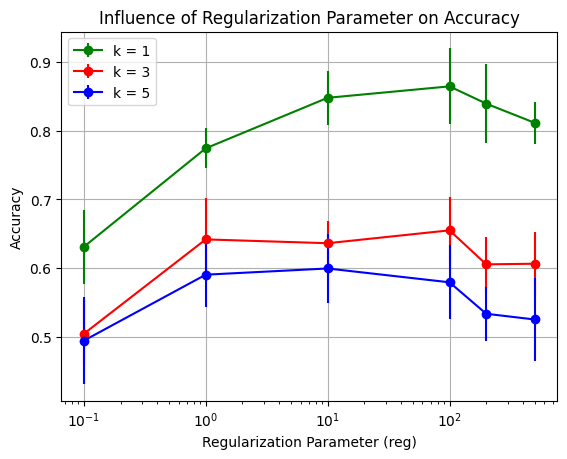

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Example usage:
reg = [0.1, 1.0, 10.0, 100.0, 200.0, 500.0]
acc_1 = k_1_acc.accuracy_1['mean'].to_list()
acc_3 = k_3_acc.accuracy_3['mean'].to_list()
acc_5 = k_5_acc.accuracy_5['mean'].to_list()

std_1 = k_1_acc.accuracy_1['std'].to_list()
std_3 = k_3_acc.accuracy_3['std'].to_list()
std_5 = k_5_acc.accuracy_5['std'].to_list()


plt.errorbar(reg, acc_1, yerr=std_1, marker='o', linestyle='-', label='k = 1', color='green')
plt.errorbar(reg, acc_3, yerr=std_3, marker='o', linestyle='-', label='k = 3', color='red')
plt.errorbar(reg, acc_5, yerr=std_5, marker='o', linestyle='-', label='k = 5', color='blue')



plt.xscale('log')
plt.xlabel('Regularization Parameter (reg)')
plt.ylabel('Accuracy')
plt.title('Influence of Regularization Parameter on Accuracy')
plt.grid(True)
plt.legend()
plt.show()

